In [12]:
import pandas as pd

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Train.csv")

In [15]:
df.head(10)

,INDEX_,ACCNUM,YEAR,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,...,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,ObjectId
0,3387730,892658.0,2006,2006/03/11 05:00:00+00,852,BLOOR ST W,DUNDAS ST W,NaN,Major Arterial,Toronto and East York,...,Yes,NaN,NaN,NaN,88,High Park North,88,High Park North (88),D11,1
1,3387731,892658.0,2006,2006/03/11 05:00:00+00,852,BLOOR ST W,DUNDAS ST W,NaN,Major Arterial,Toronto and East York,...,Yes,NaN,NaN,NaN,88,High Park North,88,High Park North (88),D11,2
2,3388101,892810.0,2006,2006/03/11 05:00:00+00,915,MORNINGSIDE AVE,SHEPPARD AVE E,NaN,Major Arterial,Scarborough,...,Yes,Yes,NaN,NaN,146,Malvern East,132,Malvern (132),D42,3
3,3389067,893184.0,2006,2006/01/01 05:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,...,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,4
4,3388102,892810.0,2006,2006/03/11 05:00:00+00,915,MORNINGSIDE AVE,SHEPPARD AVE E,NaN,Major Arterial,Scarborough,...,Yes,Yes,NaN,NaN,146,Malvern East,132,Malvern (132),D42,5
5,3387793,892682.0,2006,2006/03/12 05:00:00+00,240,EGLINTON AVE E,COMMONWEALTH AVE,NaN,Major Arterial,Scarborough,...,NaN,NaN,Yes,NaN,124,Kennedy Park,138,Eglinton East (138),D41,6
6,3389068,893184.0,2006,2006/01/01 05:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,...,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,7
7,3389069,893184.0,2006,2006/01/01 05:00:00+00,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,...,Yes,NaN,Yes,NaN,60,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,8
8,3387794,892682.0,2006,2006/03/12 05:00:00+00,240,EGLINTON AVE E,COMMONWEALTH AVE,NaN,Major Arterial,Scarborough,...,NaN,NaN,Yes,NaN,124,Kennedy Park,138,Eglinton East (138),D41,9
9,3387795,892682.0,2006,2006/03/12 05:00:00+00,240,EGLINTON AVE E,COMMONWEALTH AVE,NaN,Major Arterial,Scarborough,...,NaN,NaN,Yes,NaN,124,Kennedy Park,138,Eglinton East (138),D41,10


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 55 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   INDEX_             15000 non-null  int64  
 1   ACCNUM             11302 non-null  float64
 2   YEAR               15000 non-null  int64  
 3   DATE               15000 non-null  object 
 4   TIME               15000 non-null  int64  
 5   STREET1            15000 non-null  object 
 6   STREET2            13657 non-null  object 
 7   OFFSET             1928 non-null   object 
 8   ROAD_CLASS         14643 non-null  object 
 9   DISTRICT           14986 non-null  object 
 10  WARDNUM            15000 non-null  int64  
 11  LATITUDE           15000 non-null  float64
 12  LONGITUDE          15000 non-null  float64
 13  LOCCOORD           14910 non-null  object 
 14  ACCLOC             9550 non-null   object 
 15  TRAFFCTL           14971 non-null  object 
 16  VISIBILITY         149

In [17]:
import plotly.express as px
# Assuming 'df' is your DataFrame containing the data
# Replace 'RDSFCOND' with the actual column name containing road conditions data

# Group by road conditions and count the frequency of each
road_condition_counts = df['RDSFCOND'].value_counts().reset_index()
road_condition_counts.columns = ['Road Condition', 'Frequency']

# Create a bar plot using Plotly
fig = px.bar(road_condition_counts, x='Road Condition', y='Frequency',
             title='Frequency of Road Conditions in Traffic Collisions',
             labels={'Frequency': 'Collision Count', 'Road Condition': 'Road Condition'})

# Show the plot
fig.show()

In [18]:
# Group by state and road conditions, and count the frequency of each
state_road_condition_counts = df.groupby(['DISTRICT', 'RDSFCOND']).size().reset_index(name='Frequency')

# Create a bar plot using Plotly
fig = px.bar(state_road_condition_counts, x='DISTRICT', y='Frequency', color='RDSFCOND',
             title='Frequency of Road Conditions by State',
             labels={'Frequency': 'Collision Count', 'DISTRICT': 'State', 'RDSFCOND': 'Road Condition'},
             barmode='group')

# Show the plot
fig.show()

In [19]:
# Group by road conditions and visibility, and count the frequency of each
condition_counts = df.groupby(['RDSFCOND', 'VISIBILITY']).size().reset_index(name='Frequency')

# Create a bar plot using Plotly
fig = px.bar(condition_counts, x='RDSFCOND', y='Frequency', color='VISIBILITY',
             title='Frequency of Collisions by Road Conditions and Visibility',
             labels={'Frequency': 'Collision Count', 'RDSFCOND': 'Road Condition', 'VISIBILITY': 'Visibility'},
             barmode='group')

# Show the plot
fig.show()

In [20]:

# Group by year and count the occurrences of collisions
yearly_collision_counts = df['YEAR'].value_counts().reset_index()
yearly_collision_counts.columns = ['Year', 'Collision Count']

# Sort the DataFrame by year
yearly_collision_counts = yearly_collision_counts.sort_values(by='Year')

# Create a line plot using Plotly
fig = px.bar(yearly_collision_counts, x='Year', y='Collision Count',
              title='Year-wise Occurrence of Collisions',
              labels={'Collision Count': 'Collision Count', 'Year': 'Year'})

# Show the plot
fig.show()

In [21]:
# Group by year and state and count the occurrences of collisions
state_yearly_collision_counts = df.groupby(['DISTRICT', 'YEAR']).size().reset_index(name='Collision Count')

# Sort the DataFrame by year
state_yearly_collision_counts = state_yearly_collision_counts.sort_values(by=['DISTRICT', 'YEAR'])

# Create a grouped bar plot using Plotly
fig = px.bar(state_yearly_collision_counts, x='YEAR', y='Collision Count', color='DISTRICT',
             title='Year-wise Occurrence of Collisions by State',
             labels={'Collision Count': 'Collision Count', 'YEAR': 'Year', 'DISTRICT': 'State'},
             barmode='group')

# Show the plot
fig.show()

In [22]:
# Group by light and visibility conditions and count the occurrences of collisions
light_visibility_counts = df.groupby(['LIGHT', 'VISIBILITY']).size().reset_index(name='Collision Count')

# Create a grouped bar plot using Plotly
fig = px.bar(light_visibility_counts, x='LIGHT', y='Collision Count', color='VISIBILITY',
             title='Comparison of Light and Visibility Conditions in Collisions',
             labels={'Collision Count': 'Collision Count', 'LIGHT': 'Light Condition', 'VISIBILITY': 'Visibility Condition'},
             barmode='group')

# Show the plot
fig.show()

In [23]:
# Filter out rows with null age values and get unique age groups
valid_age_groups = df.dropna(subset=['INVAGE'])['INVAGE'].unique()

# Group by age group, light conditions, and visibility conditions, and count the occurrences of collisions
age_light_visibility_counts = df.groupby(['INVAGE', 'LIGHT', 'VISIBILITY']).size().reset_index(name='Collision Count')

# Filter only the rows with valid age groups
age_light_visibility_counts = age_light_visibility_counts[age_light_visibility_counts['INVAGE'].isin(valid_age_groups)]

# Create a grouped bar plot using Plotly
fig = px.bar(age_light_visibility_counts, x='INVAGE', y='Collision Count', color='VISIBILITY',
             facet_col='LIGHT', facet_col_wrap=3,
             title='Comparison of Light and Visibility Conditions by Age Group',
             labels={'Collision Count': 'Collision Count', 'INVAGE': 'Age Group', 'VISIBILITY': 'Visibility Condition'},
             barmode='group')

# Show the plot
fig.show()

In [24]:
# Filter out rows with null age values and get unique age groups
valid_age_groups = df.dropna(subset=['INVAGE'])['INVAGE'].unique()

# Group by age group and count the occurrences of collisions
age_collision_counts = df['INVAGE'].value_counts().reset_index()
age_collision_counts.columns = ['Age Group', 'Collision Count']

# Filter only the rows with valid age groups
age_collision_counts = age_collision_counts[age_collision_counts['Age Group'].isin(valid_age_groups)]

# Create a bar plot using Plotly
fig = px.bar(age_collision_counts, x='Age Group', y='Collision Count',
             title='Collision Occurrences by Age Group',
             labels={'Collision Count': 'Collision Count', 'Age Group': 'Age Group'})

# Show the plot
fig.show()

In [25]:
# Group by injury type and count the occurrences of collisions
injury_collision_counts = df['INJURY'].value_counts().reset_index()
injury_collision_counts.columns = ['Injury Type', 'Collision Count']

# Create a bar plot using Plotly
fig = px.bar(injury_collision_counts, x='Injury Type', y='Collision Count',
             title='Collision Occurrences by Injury Type',
             labels={'Collision Count': 'Collision Count', 'Injury Type': 'Injury Type'})

# Show the plot
fig.show()

In [26]:
# Group by initial direction of travel and count the occurrences of collisions
initdir_collision_counts = df['INITDIR'].value_counts().reset_index()
initdir_collision_counts.columns = ['Initial Direction', 'Collision Count']

# Create a bar plot using Plotly
fig = px.bar(initdir_collision_counts, x='Initial Direction', y='Collision Count',
             title='Collision Occurrences by Initial Direction of Travel',
             labels={'Collision Count': 'Collision Count', 'Initial Direction': 'Initial Direction'})

# Show the plot
fig.show()

In [27]:
# Group by driver condition and count the occurrences of collisions
drivcond_collision_counts = df['DRIVCOND'].value_counts().reset_index()
drivcond_collision_counts.columns = ['Driver Condition', 'Collision Count']

# Create a bar plot using Plotly
fig = px.bar(drivcond_collision_counts, x='Driver Condition', y='Collision Count',
             title='Collision Occurrences by Driver Condition',
             labels={'Collision Count': 'Collision Count', 'Driver Condition': 'Driver Condition'})

# Show the plot
fig.show()

In [28]:
# Filter out rows with missing vehicle type
df_filtered = df.dropna(subset=['VEHTYPE'])

# Group by vehicle type and count the occurrences
collision_counts = df_filtered['VEHTYPE'].value_counts().reset_index()
collision_counts.columns = ['Vehicle Type', 'Collision Count']

# Create a bar chart using Plotly Express
fig = px.bar(collision_counts, x='Vehicle Type', y='Collision Count',
             title='Total Collision Comparison by Vehicle Type',
             labels={'Vehicle Type': 'Vehicle Type', 'Collision Count': 'Collision Count'})

# Show the plot
fig.show()

In [29]:
# Filter out rows with missing pedestrian condition
df_filtered = df.dropna(subset=['PEDCOND'])

# Group by pedestrian condition and count the occurrences
collision_counts = df_filtered['PEDCOND'].value_counts().reset_index()
collision_counts.columns = ['Pedestrian Condition', 'Collision Count']

# Create a bar chart using Plotly Express
fig = px.bar(collision_counts, x='Pedestrian Condition', y='Collision Count',
             title='Total Collision Comparison by Pedestrian Condition',
             labels={'Pedestrian Condition': 'Pedestrian Condition', 'Collision Count': 'Collision Count'})

# Show the plot
fig.show()

In [30]:
# Count the occurrences of each factor
counts = {
    'Cyclist Involved': df['CYCLIST'].notnull().sum(),
    'Pedestrian Involved': df['PEDESTRIAN'].notnull().sum(),
    'Transit or City Vehicle Involved': df['TRSN_CITY_VEH'].notnull().sum(),
    'Passenger Involved': df['PASSENGER'].notnull().sum(),
    'Speeding Related': df['SPEEDING'].notnull().sum(),
    'Red Light Related': df['REDLIGHT'].notnull().sum(),
    'Alcohol Related': df['ALCOHOL'].notnull().sum(),
}

# Create a DataFrame from the counts
data = pd.DataFrame.from_dict(counts, orient='index', columns=['Count']).reset_index()

# Rename columns
data.columns = ['Factor', 'Count']

# Create a bar chart using Plotly Express
fig = px.bar(data, x='Factor', y='Count',
             title='Total Accidents and Involvement of Different Factors',
             labels={'Factor': 'Factor', 'Count': 'Count'})

# Show the plot
fig.show()

In [31]:
# Count the occurrences of each factor
counts = {
    'Cyclist Involved': df['CYCLIST'].notnull().sum(),
    'Pedestrian Involved': df['PEDESTRIAN'].notnull().sum(),
    'Transit or City Vehicle Involved': df['TRSN_CITY_VEH'].notnull().sum(),
    'Passenger Involved': df['PASSENGER'].notnull().sum(),
    'Speeding Related': df['SPEEDING'].notnull().sum(),
    'Red Light Related': df['REDLIGHT'].notnull().sum(),
    'Alcohol Related': df['ALCOHOL'].notnull().sum(),
}

# Create a DataFrame from the counts
data = pd.DataFrame.from_dict(counts, orient='index', columns=['Count']).reset_index()

# Rename columns
data.columns = ['Factor', 'Count']

# Create a pie chart using Plotly Express
fig = px.pie(data, names='Factor', values='Count',
             title='Distribution of Accidents by Factor')

# Show the plot
fig.show()

In [32]:
# Filter out rows with missing involvement type
df_filtered = df.dropna(subset=['INVTYPE'])

# Group by involvement type and count the occurrences
collision_counts = df_filtered['INVTYPE'].value_counts().reset_index()
collision_counts.columns = ['Involvement Type', 'Collision Count']

# Create a bar chart using Plotly Express
fig = px.bar(collision_counts, x='Involvement Type', y='Collision Count',
             title='Total Collisions by Involvement Type',
             labels={'Involvement Type': 'Involvement Type', 'Collision Count': 'Collision Count'})

# Show the plot
fig.show()

In [33]:
# Filter out rows with missing district information
df_filtered = df.dropna(subset=['DISTRICT'])

# Group by district and count the occurrences
district_counts = df_filtered['DISTRICT'].value_counts().reset_index()
district_counts.columns = ['District', 'Collision Count']

# Create a bar chart using Plotly Express
fig = px.bar(district_counts, x='District', y='Collision Count',
             title='Total Collisions by District',
             labels={'District': 'District', 'Collision Count': 'Collision Count'})

# Show the plot
fig.show()

In [34]:
# Define a function to map dates to seasons
def get_season(date):
    month = date.month
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

# Convert the 'DATE' column to datetime format if it's not already
df['DATE'] = pd.to_datetime(df['DATE'])

# Apply the function to create a new column for seasons
df['SEASON'] = df['DATE'].apply(get_season)

In [35]:
# Filter out rows with missing season information
df_filtered = df.dropna(subset=['SEASON'])

# Group by season and count the occurrences
season_counts = df_filtered['SEASON'].value_counts().reset_index()
season_counts.columns = ['Season', 'Accident Count']

# Create a bar chart using Plotly Express
fig = px.bar(season_counts, x='Season', y='Accident Count',
             title='Accidents by Season',
             labels={'Season': 'Season', 'Accident Count': 'Number of Accidents'})

# Show the plot
fig.show()

In [36]:
# Filter out rows with missing season and district information
df_filtered = df.dropna(subset=['SEASON', 'DISTRICT'])

# Group by season and district and count the occurrences
season_district_counts = df_filtered.groupby(['DISTRICT', 'SEASON']).size().reset_index(name='Accident Count')

# Create a grouped bar chart using Plotly Express
fig = px.bar(season_district_counts, x='DISTRICT', y='Accident Count', color='SEASON',
             title='Accidents by District and Season',
             labels={'DISTRICT': 'District', 'Accident Count': 'Number of Accidents'})

# Show the plot
fig.show()

In [37]:
null_count = df.columns[df.isnull().any()]

print(null_count)

Index(['ACCNUM', 'STREET2', 'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'LOCCOORD',
       'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'RDSFCOND', 'INVTYPE', 'INJURY',
       'FATAL_NO', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND',
       'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND',
       'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
       'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY'],
      dtype='object')


In [38]:
# First result: Total null values for each feature
null_counts = df.isnull().sum()
null_df = pd.DataFrame(null_counts, columns=["Missing Values"])

# Second result: Total unique values for each feature
unique_values = df.nunique().reset_index()
unique_values.columns = ["Feature", "Unique Values"]

# Combine the two DataFrames
combined_df = pd.merge(unique_values, null_df, left_on="Feature", right_index=True)

# Display the combined DataFrame
print(combined_df)

              Feature  Unique Values  Missing Values
0              INDEX_          15000               0
1              ACCNUM           3822            3698
2                YEAR             13               0
3                DATE           3082               0
4                TIME           1276               0
5             STREET1           1547               0
6             STREET2           2344            1343
7              OFFSET            339           13072
8          ROAD_CLASS              9             357
9            DISTRICT              4              14
10            WARDNUM             71               0
11           LATITUDE           3475               0
12          LONGITUDE           3901               0
13           LOCCOORD              7              90
14             ACCLOC              9            5450
15           TRAFFCTL             10              29
16         VISIBILITY              8              14
17              LIGHT              9          

In [39]:
df[df['FATAL_NO'] == df['FATAL_NO'].notnull()]

,INDEX_,ACCNUM,YEAR,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,...,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,ObjectId,SEASON
2070,5307141,1012986.0,2008,2008-01-05 05:00:00+00:00,1826,EGLINTON AVE E,OSWEGO RD,NaN,Major Arterial,Scarborough,...,NaN,NaN,NaN,138,Eglinton East,138,Eglinton East (138),D43,2071,Winter
4997,5188679,1078551.0,2009,2009-01-01 05:00:00+00:00,259,EGLINTON AVE E,DANFORTH RD,NaN,Major Arterial,Scarborough,...,NaN,NaN,NaN,138,Eglinton East,138,Eglinton East (138),D43,4998,Winter
5839,6253428,1146864.0,2010,2010-01-10 05:00:00+00:00,329,KING ST E,PARLIAMENT ST,NaN,Major Arterial,Toronto and East York,...,NaN,NaN,NaN,73,Moss Park,73,Moss Park (73),D51,5840,Winter
6743,6583562,1212031.0,2011,2011-01-11 05:00:00+00:00,1023,QUEEN ST W,BATHURST ST,NaN,Major Arterial,Toronto and East York,...,NaN,NaN,NaN,78,Kensington-Chinatown,78,Kensington-Chinatown (78),D14,6744,Winter
7327,7376307,1274722.0,2012,2012-01-12 05:00:00+00:00,2110,FOREST GROVE DR,PAGE AVE,NaN,Local,North York,...,NaN,NaN,NaN,52,Bayview Village,52,Bayview Village (52),D33,7328,Winter
9830,7774165,1334928.0,2013,2013-01-10 05:00:00+00:00,1851,MORNINGSIDE AVE,OLD FINCH AVE,NaN,Minor Arterial,Scarborough,...,Yes,NaN,NaN,146,Malvern East,132,Malvern (132),D42,9831,Winter
10256,80000020,141375171.0,2014,2014-01-19 05:00:00+00:00,2145,EGLINTON AVE W,NORTHCLIFFE BLVD,NaN,Major Arterial,North York,...,NaN,NaN,NaN,107,Oakwood Village,107,Oakwood Village (107),D13,10257,Winter
11303,80000105,NaN,2015,2015-01-11 05:00:00+00:00,353,477 BROADVIEW AVE,NaN,NaN,Minor Arterial,Toronto and East York,...,NaN,NaN,NaN,68,North Riverdale,68,North Riverdale (68),D55,11304,Winter
12498,80497621,NaN,2016,2016-01-03 05:00:00+00:00,1915,1400 KENNEDY RD,NaN,196 m North of,Major Arterial,Scarborough,...,NaN,NaN,NaN,126,Dorset Park,126,Dorset Park (126),D41,12499,Winter
13571,80609323,NaN,2017,2017-01-03 05:00:00+00:00,717,LOWER SHERBOURNE ST,THE ESPLANADE,NaN,Minor Arterial,Toronto and East York,...,NaN,NaN,NaN,166,St Lawrence-East Bayfront-The Islands,77,Waterfront Communities-The Island (77),D51,13572,Winter


In [40]:
df[df["CYCACT"] == df['CYCACT'].unique]

,INDEX_,ACCNUM,YEAR,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,...,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,ObjectId,SEASON


In [41]:
df['CYCACT'].unique()

array([nan, 'Failed to Yield Right of Way', 'Driving Properly', 'Other',
       'Improper Passing', 'Disobeyed Traffic Control', 'Lost control',
       'Improper Turn', 'Improper Lane Change', 'Following too Close',
       'Speed too Fast For Condition', 'Wrong Way on One Way Road'],
      dtype=object)

In [42]:
# Get a specific value from the "MOTORCYCLE" column
motorcycle_value = df.at[0, "MOTORCYCLE"]

# Convert the value to a string
str_motorcycle_value = str(motorcycle_value)

# Display the resulting string
print(str_motorcycle_value)

nan


In [43]:
df.dtypes

INDEX_                             int64
ACCNUM                           float64
YEAR                               int64
DATE                 datetime64[ns, UTC]
TIME                               int64
STREET1                           object
STREET2                           object
OFFSET                            object
ROAD_CLASS                        object
DISTRICT                          object
WARDNUM                            int64
LATITUDE                         float64
LONGITUDE                        float64
LOCCOORD                          object
ACCLOC                            object
TRAFFCTL                          object
VISIBILITY                        object
LIGHT                             object
RDSFCOND                          object
ACCLASS                           object
IMPACTYPE                         object
INVTYPE                           object
INVAGE                            object
INJURY                            object
FATAL_NO        

In [44]:
df["YEAR"]

0        2006
1        2006
2        2006
3        2006
4        2006
         ... 
14995    2018
14996    2018
14997    2018
14998    2018
14999    2018
Name: YEAR, Length: 15000, dtype: int64

In [45]:
df["TIME"].isna().sum()

0

In [46]:
df["DATE"].isna().sum()

0

In [47]:
df['DATE'] = pd.to_datetime(df['DATE'])

# Accessing year, month, and day components
df['Year'] = df['DATE'].dt.year
df['Month'] = df['DATE'].dt.month
df['Day'] = df['DATE'].dt.day

# Displaying the updated DataFrame
print(df[['DATE', 'Year', 'Month', 'Day']].head())

                       DATE  Year  Month  Day
0 2006-03-11 05:00:00+00:00  2006      3   11
1 2006-03-11 05:00:00+00:00  2006      3   11
2 2006-03-11 05:00:00+00:00  2006      3   11
3 2006-01-01 05:00:00+00:00  2006      1    1
4 2006-03-11 05:00:00+00:00  2006      3   11


In [48]:
duplicate_accidents = df[df.duplicated(subset=['ACCNUM'], keep=False)]

duplicate_accidents.shape

(14857, 59)

In [49]:
df.columns

Index(['INDEX_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'STREET1', 'STREET2',
       'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'WARDNUM', 'LATITUDE', 'LONGITUDE',
       'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
       'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO',
       'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE',
       'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN',
       'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH',
       'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL',
       'DISABILITY', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140',
       'NEIGHBOURHOOD_140', 'DIVISION', 'ObjectId', 'SEASON', 'Year', 'Month',
       'Day'],
      dtype='object')

In [50]:
one_accident = df[df.duplicated(subset=['TIME', 'DIVISION','LATITUDE','LONGITUDE' ,'STREET1', 'STREET2', 'NEIGHBOURHOOD_140','NEIGHBOURHOOD_158' ,'HOOD_140'], keep=False)]

# Group by the condition and assign a unique index ID
one_accident['ACC_NUM'] = one_accident.groupby(['TIME', 'DIVISION','LATITUDE','LONGITUDE' ,'STREET1', 'STREET2', 'NEIGHBOURHOOD_140','NEIGHBOURHOOD_158', 'HOOD_140']).ngroup()

# Merge the unique index IDs back to the original DataFrame
df = pd.merge(df, one_accident[['ACC_NUM']], left_index=True, right_index=True, how='left')


<ipython-input-50-26fde825d231>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [51]:
df[df['ACC_NUM'] > 0]

,INDEX_,ACCNUM,YEAR,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,...,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,ObjectId,SEASON,Year,Month,Day,ACC_NUM
0,3387730,892658.0,2006,2006-03-11 05:00:00+00:00,852,BLOOR ST W,DUNDAS ST W,NaN,Major Arterial,Toronto and East York,...,High Park North,88,High Park North (88),D11,1,Spring,2006,3,11,1038.0
1,3387731,892658.0,2006,2006-03-11 05:00:00+00:00,852,BLOOR ST W,DUNDAS ST W,NaN,Major Arterial,Toronto and East York,...,High Park North,88,High Park North (88),D11,2,Spring,2006,3,11,1038.0
2,3388101,892810.0,2006,2006-03-11 05:00:00+00:00,915,MORNINGSIDE AVE,SHEPPARD AVE E,NaN,Major Arterial,Scarborough,...,Malvern East,132,Malvern (132),D42,3,Spring,2006,3,11,1139.0
3,3389067,893184.0,2006,2006-01-01 05:00:00+00:00,236,WOODBINE AVE,O CONNOR DR,NaN,Major Arterial,Toronto and East York,...,Woodbine-Lumsden,60,Woodbine-Lumsden (60),D55,4,Winter,2006,1,1,308.0
4,3388102,892810.0,2006,2006-03-11 05:00:00+00:00,915,MORNINGSIDE AVE,SHEPPARD AVE E,NaN,Major Arterial,Scarborough,...,Malvern East,132,Malvern (132),D42,5,Spring,2006,3,11,1139.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,81474608,NaN,2018,2018-04-26 04:00:00+00:00,1942,ISLINGTON AVE,ALBION RD,NaN,Major Arterial,Etobicoke York,...,Thistletown-Beaumond Heights,3,Thistletown-Beaumond Heights (3),D23,14996,Spring,2018,4,26,3679.0
14996,81474609,NaN,2018,2018-04-26 04:00:00+00:00,1942,ISLINGTON AVE,ALBION RD,NaN,Major Arterial,Etobicoke York,...,Thistletown-Beaumond Heights,3,Thistletown-Beaumond Heights (3),D23,14997,Spring,2018,4,26,3679.0
14997,81474610,NaN,2018,2018-04-26 04:00:00+00:00,1942,ISLINGTON AVE,ALBION RD,NaN,Major Arterial,Etobicoke York,...,Thistletown-Beaumond Heights,3,Thistletown-Beaumond Heights (3),D23,14998,Spring,2018,4,26,3679.0
14998,81474611,NaN,2018,2018-04-26 04:00:00+00:00,1942,ISLINGTON AVE,ALBION RD,NaN,Major Arterial,Etobicoke York,...,Thistletown-Beaumond Heights,3,Thistletown-Beaumond Heights (3),D23,14999,Spring,2018,4,26,3679.0


In [52]:
df = df.sort_values("ACC_NUM")

In [53]:
df['ACC_NUM'].isna().sum()

1544

In [54]:
!pip install klib

In [55]:
import klib

In [56]:
df.dtypes

INDEX_                             int64
ACCNUM                           float64
YEAR                               int64
DATE                 datetime64[ns, UTC]
TIME                               int64
STREET1                           object
STREET2                           object
OFFSET                            object
ROAD_CLASS                        object
DISTRICT                          object
WARDNUM                            int64
LATITUDE                         float64
LONGITUDE                        float64
LOCCOORD                          object
ACCLOC                            object
TRAFFCTL                          object
VISIBILITY                        object
LIGHT                             object
RDSFCOND                          object
ACCLASS                           object
IMPACTYPE                         object
INVTYPE                           object
INVAGE                            object
INJURY                            object
FATAL_NO        

In [57]:
klib.convert_datatypes(df)

,INDEX_,ACCNUM,YEAR,DATE,TIME,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,...,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,ObjectId,SEASON,Year,Month,Day,ACC_NUM
6426,6588942,1215284.0,2011,2011-01-29 05:00:00+00:00,0,BLOOR ST W,CONCORD AVE,NaN,Major Arterial,Toronto and East York,...,Dovercourt Village,93,Dovercourt-Wallace Emerson-Junction (93),D14,6427,Winter,2011,1,29,0.0
6417,6588941,1215284.0,2011,2011-01-29 05:00:00+00:00,0,BLOOR ST W,CONCORD AVE,NaN,Major Arterial,Toronto and East York,...,Dovercourt Village,93,Dovercourt-Wallace Emerson-Junction (93),D14,6418,Winter,2011,1,29,0.0
6414,6588940,1215284.0,2011,2011-01-29 05:00:00+00:00,0,BLOOR ST W,CONCORD AVE,NaN,Major Arterial,Toronto and East York,...,Dovercourt Village,93,Dovercourt-Wallace Emerson-Junction (93),D14,6415,Winter,2011,1,29,0.0
4034,5245962,1107460.0,2009,2009-06-22 04:00:00+00:00,0,F G GARDINER XY E,KIPLING AVE,NaN,NaN,Etobicoke York,...,Mimico-Queensway,17,Mimico (includes Humber Bay Shores) (17),D22,4035,Summer,2009,6,22,1.0
4033,5245961,1107460.0,2009,2009-06-22 04:00:00+00:00,0,F G GARDINER XY E,KIPLING AVE,NaN,NaN,Etobicoke York,...,Mimico-Queensway,17,Mimico (includes Humber Bay Shores) (17),D22,4034,Summer,2009,6,22,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14905,80926724,NaN,2018,2018-02-03 05:00:00+00:00,1525,8 HERTFORD AVE,<NA>,30 m North of,Local,Etobicoke York,...,Keelesdale-Eglinton West,110,Keelesdale-Eglinton West (110),D12,14906,Winter,2018,2,3,NaN
14908,80919372,NaN,2018,2018-03-02 05:00:00+00:00,1435,2083 LAWRENCE AVE W,<NA>,NaN,Major Arterial,Etobicoke York,...,Weston,113,Weston (113),D12,14909,Spring,2018,3,2,NaN
14912,81514422,NaN,2018,2018-02-03 05:00:00+00:00,1525,8 HERTFORD AVE,<NA>,30 m North of,Local,Etobicoke York,...,Keelesdale-Eglinton West,110,Keelesdale-Eglinton West (110),D12,14913,Winter,2018,2,3,NaN
14918,80972184,NaN,2018,2018-09-21 04:00:00+00:00,2227,2265 MIDLAND AVE,<NA>,3 m West of,Major Arterial,Scarborough,...,Bendale-Glen Andrew,127,Bendale (127),D41,14919,Autumn,2018,9,21,NaN


In [58]:
df.dtypes

INDEX_                             int64
ACCNUM                           float64
YEAR                               int64
DATE                 datetime64[ns, UTC]
TIME                               int64
STREET1                           object
STREET2                           object
OFFSET                            object
ROAD_CLASS                        object
DISTRICT                          object
WARDNUM                            int64
LATITUDE                         float64
LONGITUDE                        float64
LOCCOORD                          object
ACCLOC                            object
TRAFFCTL                          object
VISIBILITY                        object
LIGHT                             object
RDSFCOND                          object
ACCLASS                           object
IMPACTYPE                         object
INVTYPE                           object
INVAGE                            object
INJURY                            object
FATAL_NO        

In [59]:
df.columns

Index(['INDEX_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'STREET1', 'STREET2',
       'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'WARDNUM', 'LATITUDE', 'LONGITUDE',
       'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND',
       'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO',
       'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE',
       'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN',
       'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH',
       'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL',
       'DISABILITY', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140',
       'NEIGHBOURHOOD_140', 'DIVISION', 'ObjectId', 'SEASON', 'Year', 'Month',
       'Day', 'ACC_NUM'],
      dtype='object')

In [60]:
df[['DATE','YEAR','Day','Month','Year']]

,DATE,YEAR,Day,Month,Year
6426,2011-01-29 05:00:00+00:00,2011,29,1,2011
6417,2011-01-29 05:00:00+00:00,2011,29,1,2011
6414,2011-01-29 05:00:00+00:00,2011,29,1,2011
4034,2009-06-22 04:00:00+00:00,2009,22,6,2009
4033,2009-06-22 04:00:00+00:00,2009,22,6,2009
...,...,...,...,...,...
14905,2018-02-03 05:00:00+00:00,2018,3,2,2018
14908,2018-03-02 05:00:00+00:00,2018,2,3,2018
14912,2018-02-03 05:00:00+00:00,2018,3,2,2018
14918,2018-09-21 04:00:00+00:00,2018,21,9,2018


In [61]:
df = df.drop(columns=['INDEX_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'STREET1', 'STREET2', 'OFFSET',
                   'DISTRICT', 'WARDNUM', 'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCLOC', 'FATAL_NO',
                   'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140',
                   'DIVISION', 'ObjectId'], axis=1)

df.head()

,ROAD_CLASS,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,...,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,SEASON,Year,Month,Day,ACC_NUM
6426,Major Arterial,No Control,Clear,Dark,Dry,Fatal,Pedestrian Collisions,Pedestrian,60 to 64,Fatal,...,NaN,Yes,NaN,NaN,NaN,Winter,2011,1,29,0.0
6417,Major Arterial,No Control,Clear,Dark,Dry,Fatal,Pedestrian Collisions,Driver,35 to 39,None,...,NaN,Yes,NaN,NaN,NaN,Winter,2011,1,29,0.0
6414,Major Arterial,No Control,Clear,Dark,Dry,Fatal,Pedestrian Collisions,Vehicle Owner,unknown,NaN,...,NaN,Yes,NaN,NaN,NaN,Winter,2011,1,29,0.0
4034,NaN,No Control,Clear,Daylight,Dry,Non-Fatal Injury,Sideswipe,Driver,40 to 44,None,...,Yes,Yes,NaN,NaN,NaN,Summer,2009,6,22,1.0
4033,NaN,No Control,Clear,Daylight,Dry,Non-Fatal Injury,Sideswipe,Motorcycle Driver,25 to 29,Major,...,Yes,Yes,NaN,NaN,NaN,Summer,2009,6,22,1.0


In [62]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

object_columns = ['ROAD_CLASS', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS',
                  'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'INITDIR', 'VEHTYPE',
                  'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND',
                  'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE',
                  'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING',
                  'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'SEASON']

for column in object_columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,ROAD_CLASS,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,...,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,SEASON,Year,Month,Day,ACC_NUM
6426,5,0,0,0,0,0,4,11,12,0,...,1,0,1,1,1,3,2011,1,29,0.0
6417,5,0,0,0,0,0,4,2,6,4,...,1,0,1,1,1,3,2011,1,29,0.0
6414,5,0,0,0,0,0,4,15,20,5,...,1,0,1,1,1,3,2011,1,29,0.0
4034,9,0,0,4,0,1,8,2,7,4,...,0,0,1,1,1,2,2009,6,22,1.0
4033,9,0,0,4,0,1,8,6,4,1,...,0,0,1,1,1,2,2009,6,22,1.0


In [63]:
df.isna().sum()

ROAD_CLASS          0
TRAFFCTL            0
VISIBILITY          0
LIGHT               0
RDSFCOND            0
ACCLASS             0
IMPACTYPE           0
INVTYPE             0
INVAGE              0
INJURY              0
INITDIR             0
VEHTYPE             0
MANOEUVER           0
DRIVACT             0
DRIVCOND            0
PEDTYPE             0
PEDACT              0
PEDCOND             0
CYCLISTYPE          0
CYCACT              0
CYCCOND             0
PEDESTRIAN          0
CYCLIST             0
AUTOMOBILE          0
MOTORCYCLE          0
TRUCK               0
TRSN_CITY_VEH       0
EMERG_VEH           0
PASSENGER           0
SPEEDING            0
AG_DRIV             0
REDLIGHT            0
ALCOHOL             0
DISABILITY          0
SEASON              0
Year                0
Month               0
Day                 0
ACC_NUM          1544
dtype: int64

In [64]:
df['ACC_NUM'].max()

4544.0

In [65]:
# Find null values in the 'ACC_NUM' column
null_values_indices = df[df['ACC_NUM'].isnull()].index

# Generate a sequence starting from 4545
sequence = range(4545, 4545 + len(null_values_indices))

# Fill null values with the generated sequence
df.loc[null_values_indices, 'ACC_NUM'] = sequence

# Display the DataFrame with filled null values
df.isna().sum()

ROAD_CLASS       0
TRAFFCTL         0
VISIBILITY       0
LIGHT            0
RDSFCOND         0
ACCLASS          0
IMPACTYPE        0
INVTYPE          0
INVAGE           0
INJURY           0
INITDIR          0
VEHTYPE          0
MANOEUVER        0
DRIVACT          0
DRIVCOND         0
PEDTYPE          0
PEDACT           0
PEDCOND          0
CYCLISTYPE       0
CYCACT           0
CYCCOND          0
PEDESTRIAN       0
CYCLIST          0
AUTOMOBILE       0
MOTORCYCLE       0
TRUCK            0
TRSN_CITY_VEH    0
EMERG_VEH        0
PASSENGER        0
SPEEDING         0
AG_DRIV          0
REDLIGHT         0
ALCOHOL          0
DISABILITY       0
SEASON           0
Year             0
Month            0
Day              0
ACC_NUM          0
dtype: int64

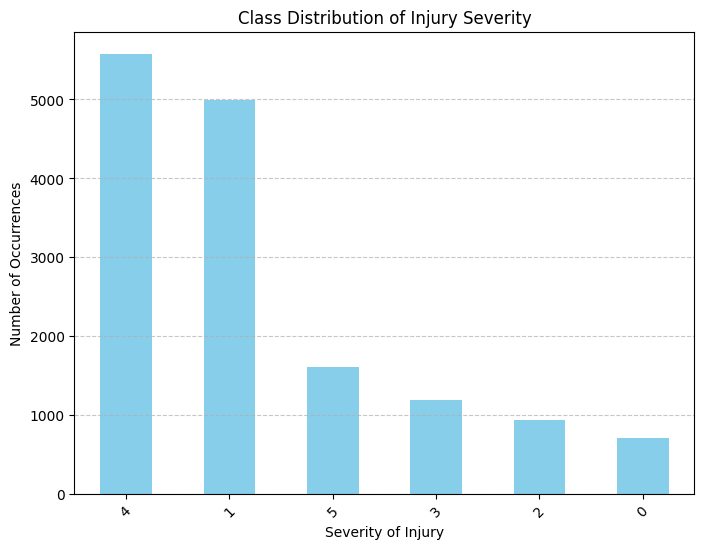

4    5583
1    4991
5    1606
3    1183
2     936
0     701
Name: INJURY, dtype: int64


In [66]:
# Class distribution

import matplotlib.pyplot as plt

class_distribution = df['INJURY'].value_counts()


# Plot the class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Injury Severity')
plt.xlabel('Severity of Injury')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(class_distribution)

In [67]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Assuming 'X' contains your features and 'y' contains your target variable
X = df.drop('INJURY', axis=1)  # Assuming 'INJURY' is your target column
y = df['INJURY']

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Perform oversampling
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display the class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_resampled))

Class distribution after oversampling: Counter({0: 5583, 4: 5583, 5: 5583, 1: 5583, 2: 5583, 3: 5583})


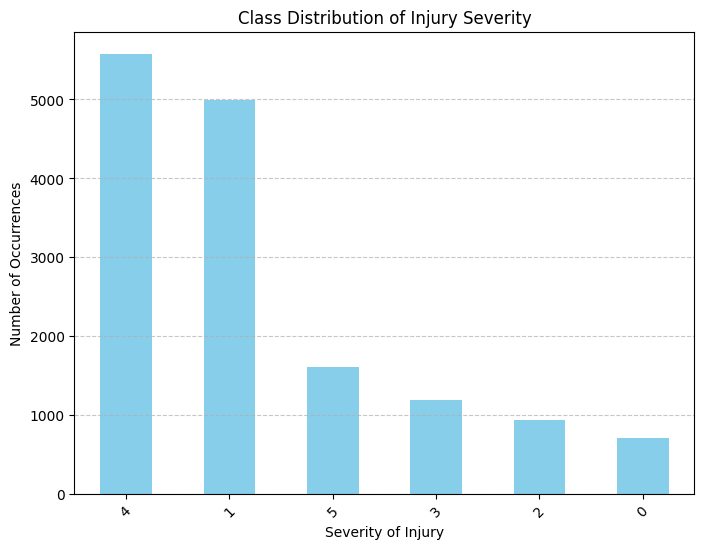

4    5583
1    4991
5    1606
3    1183
2     936
0     701
Name: INJURY, dtype: int64


In [68]:
class_distribution = df['INJURY'].value_counts()


# Plot the class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution of Injury Severity')
plt.xlabel('Severity of Injury')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(class_distribution)

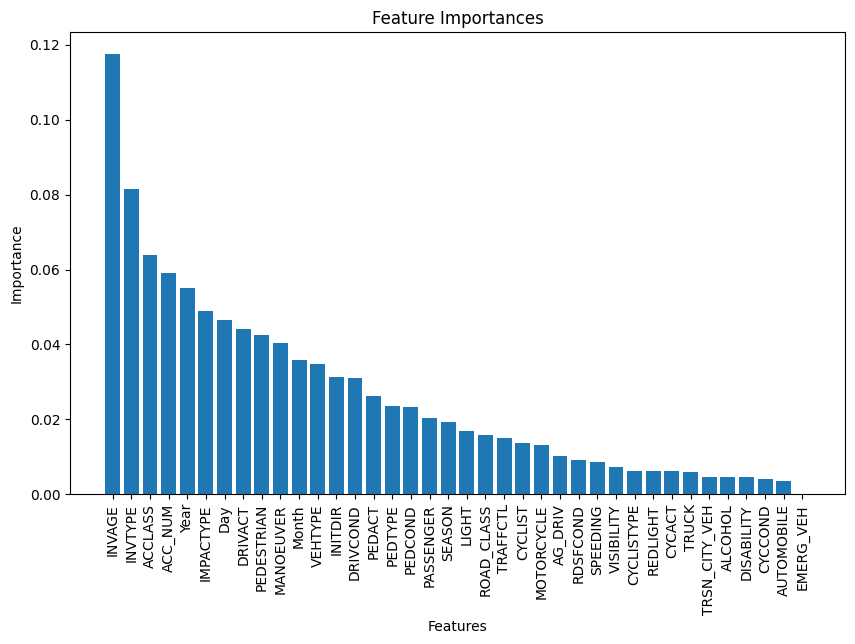

In [69]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop('INJURY', axis=1)
y = df['INJURY']

rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X, y)

feature_importances = rf_classifier.feature_importances_

sorted_indices = feature_importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_importances)), X.columns[sorted_indices], rotation=90)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [73]:
from sklearn.model_selection import train_test_split

x = df.drop(["INJURY"], axis=1)
y = df["INJURY"]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size=0.75)

model = RandomForestClassifier()

model.fit(x_train, y_train)

y_pred_test = model.predict(x_test)


In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(y_test, y_pred_test)


0.7502222222222222

In [75]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[ 417,   52,    6,   21,   32,    0],
       [  32, 3057,   69,  107,  502,    2],
       [  15,  253,   74,   45,  292,    8],
       [  40,  367,   47,  112,  324,    4],
       [  22,  342,   35,   66, 3624,   73],
       [   0,    0,    0,    1,   53, 1156]])

In [76]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       528
           1       0.75      0.81      0.78      3769
           2       0.32      0.11      0.16       687
           3       0.32      0.13      0.18       894
           4       0.75      0.87      0.81      4162
           5       0.93      0.96      0.94      1210

    accuracy                           0.75     11250
   macro avg       0.64      0.61      0.61     11250
weighted avg       0.71      0.75      0.72     11250



In [77]:
# Map all non-fatal injuries to a single category
df['INJURY'] = df['INJURY'].apply(lambda x: 'Non-Fatal' if x != 'Fatal' else x)

# Separate features (X) and target variable (y)
X = df.drop(["INJURY"], axis=1)
y = df["INJURY"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.75)

# Instantiate and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = model.predict(X_test)# Map all non-fatal injuries to a single category
df['INJURY'] = df['INJURY'].apply(lambda x: 'Non-Fatal' if x != 'Fatal' else x)

# Separate features (X) and target variable (y)
X = df.drop(["INJURY"], axis=1)
y = df["INJURY"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.75)

# Instantiate and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = model.predict(X_test)

In [78]:
accuracy_score(y_test, y_pred_test)


1.0

In [79]:
confusion_matrix(y_test, y_pred_test)

array([[11250]])

In [80]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

   Non-Fatal       1.00      1.00      1.00     11250

    accuracy                           1.00     11250
   macro avg       1.00      1.00      1.00     11250
weighted avg       1.00      1.00      1.00     11250



In [81]:
df_tr = pd.read_csv("/content/drive/MyDrive/Datasets/Test.csv")

In [ ]:
# Map all non-fatal injuries to a single category
df['INJURY'] = df['INJURY'].apply(lambda x: 'Non-Fatal' if x != 'Fatal' else x)

# Separate features (X) and target variable (y)
X = df.drop(["INJURY"], axis=1)
y = df["INJURY"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.75)

# Instantiate and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = model.predict(X_test)# Map all non-fatal injuries to a single category
df['INJURY'] = df['INJURY'].apply(lambda x: 'Non-Fatal' if x != 'Fatal' else x)

# Separate features (X) and target variable (y)
X = df.drop(["INJURY"], axis=1)
y = df["INJURY"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.75)

# Instantiate and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = model.predict(X_test)

In [ ]:

train_df = pd.read_csv("/content/drive/MyDrive/Datasets/Train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Datasets/Test.csv")

# Map all non-fatal injuries to a single category in both train and test datasets
train_df['INJURY'] = train_df['INJURY'].apply(lambda x: 'Non-Fatal' if x != 'Fatal' else x)
test_df['INJURY'] = test_df['INJURY'].apply(lambda x: 'Non-Fatal' if x != 'Fatal' else x)

# Separate features and target variable for both train and test datasets
X_train = train_df.drop(["INJURY"], axis=1)
y_train = train_df["INJURY"]
X_test = test_df.drop(["INJURY"], axis=1)
y_test = test_df["INJURY"]

# Instantiate and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = model.predict(X_test)

In [82]:
train_df_cleaned = df.copy()

In [83]:
train_df_cleaned

,ROAD_CLASS,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,...,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,SEASON,Year,Month,Day,ACC_NUM
6426,5,0,0,0,0,0,4,11,12,Non-Fatal,...,1,0,1,1,1,3,2011,1,29,0.0
6417,5,0,0,0,0,0,4,2,6,Non-Fatal,...,1,0,1,1,1,3,2011,1,29,0.0
6414,5,0,0,0,0,0,4,15,20,Non-Fatal,...,1,0,1,1,1,3,2011,1,29,0.0
4034,9,0,0,4,0,1,8,2,7,Non-Fatal,...,0,0,1,1,1,2,2009,6,22,1.0
4033,9,0,0,4,0,1,8,6,4,Non-Fatal,...,0,0,1,1,1,2,2009,6,22,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14905,4,0,0,5,0,1,2,8,20,Non-Fatal,...,1,1,1,1,1,3,2018,2,3,6084.0
14908,5,0,0,4,0,1,4,2,10,Non-Fatal,...,1,1,1,1,1,1,2018,3,2,6085.0
14912,4,0,0,5,0,1,2,0,2,Non-Fatal,...,1,1,1,1,1,3,2018,2,3,6086.0
14918,5,0,0,0,0,1,4,2,20,Non-Fatal,...,1,0,1,1,1,0,2018,9,21,6087.0


In [86]:
# Apply the same cleansing steps to the test data
# For example, if you dropped certain columns in the training data, drop the same columns in the test data

test_df = pd.read_csv("/content/drive/MyDrive/Datasets/Test.csv")


test_df_cleaned = test_df.drop(columns=['INDEX_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'STREET1', 'STREET2', 'OFFSET',
                   'DISTRICT', 'WARDNUM', 'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCLOC', 'FATAL_NO',
                   'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140',
                   'DIVISION', 'ObjectId'], axis=1)  # Replace columns_to_drop with the list of columns to drop


# Map all non-fatal injuries to a single category in both train and test datasets
test_df_cleaned['INJURY'] = test_df_cleaned['INJURY'].apply(lambda x: 'Non-Fatal' if x != 'Fatal' else x)

# Separate features and target variable for the test dataset
X_test = test_df_cleaned.drop(["INJURY"], axis=1)
y_test = test_df_cleaned["INJURY"]

# Instantiate and train the model (using the preprocessed training data)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the preprocessed test set
y_pred_test = model.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- ACCLASS
- ACC_NUM
- Day
- Month
- SEASON
- ...


In [ ]:
for col in cat_columns:
    le = LabelEncoder()
    le.fit(train_df_encoded[col])
    test_df[col] = le.transform(test_df[col])